# Basic

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Importing sales pipeline dataset 

df1 = pd.read_excel("/content/drive/My Drive/sales-pipeline.xlsx")

In [ ]:
df1.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [ ]:
# Converting the Close Date feature to date format

df1['year_month'] = df1['Close Date'].dt.strftime('%Y-%m')

In [ ]:
df1.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,year_month
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,2016-05
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,2016-11
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,2016-12
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,2016-09
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,2016-09


In [ ]:
# Importing interactions dataset 

df2 = pd.read_excel("/content/drive/My Drive/interactions.xlsx")

In [ ]:
df2.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


# Sales_pipeline dataset cleaning 

In [ ]:
# Filtering all the sales proposals which are won

df1 = df1[df1['Deal_Stage']=="Won"]
df1.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,year_month
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,2016-05
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,2016-11
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24,2016-01
6,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335,2016-12
7,Y-corporation,GIUUTBXM,Kary Hendrixson,kary@piedpiper.com,rosanne@y-corporation.com,Won,GTXPro,5539,2016-01-10,2016-12-03,328,2016-12


In [ ]:
# Assuming that no matter how soon the sales proposal is made, the companies buy the product only when required
# therfore keeping only closed dates, since that is when the products are bought
# And dropping columns which dont add value 

df1.drop(['Account', 'Opportunity_ID','Sales_Agent','Deal_Stage','Created Date','DateDiff','Close Date'], axis='columns', inplace=True) 

In [ ]:
df1.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month
0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05
1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11
5,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01
6,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12
7,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12


# Interactions dataset cleaning

In [ ]:
# The interations data has interactions between the people from pied piper which adds no value since these are not sales interations 
# Therfore remove these interactions 

df2 = df2[~df2.toEmailId.str.contains("@piedpiper.com")]

In [ ]:
# Dropping the interation type since the average of all the interactions adds more value irrespective of the type of interaction

df2.drop(['interactionID', 'InteractionDate','InteractionType(Call/Email/SMS)'], axis='columns', inplace=True) 

In [ ]:
df2.head()

,fromEmailId,toEmailId,Extracted Interaction Text
0,gladys@piedpiper.com,kristle@dontechi.com,I thoroughly enjoyed your presentation yesterd...
1,donn@piedpiper.com,orpha@umbrellacorporation.com,speaking with you and your staff will be a tre...
2,kary@piedpiper.com,claribel@goodsilron.com,"However, I am unable to join because of my fam..."
3,boris@piedpiper.com,gordon@scotfind.com,We are extremely sorry to inform you that we h...
4,darcel@piedpiper.com,benny@treequote.com,I don't think it's possible for me to meet you


# Scoring sentiment 

In [ ]:
cols = [5]
df_interactions = pd.read_excel("/content/drive/My Drive/interactions.xlsx", usecols = cols )

In [ ]:
df_interactions.head()

,Extracted Interaction Text
0,I thoroughly enjoyed your presentation yesterd...
1,speaking with you and your staff will be a tre...
2,"However, I am unable to join because of my fam..."
3,We are extremely sorry to inform you that we h...
4,I don't think it's possible for me to meet you


In [ ]:
# Since we dont have a labeled dataset of positive and negative interations, we will score these interations based on the word in them 
# This is an unsupervised learning method which scores the interations
# The algorithm used is Affin

!pip install afinn

from afinn import Afinn
af = Afinn()

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=3911ab6a562d1a238ce1e7ff00cbeb771c5219f84193668c4fd9dffb7d591d75
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
interactions_list = df2["Extracted Interaction Text"].tolist()

In [ ]:
print(interactions_list[1:10])

['speaking with you and your staff will be a tremendous opportunity for me to present our product line. i sincerely thank you for extending this offer and expect to meet with you, as requested in your invitation, on friday, may 9, at 3:00 p.m. in your conference room.', "However, I am unable to join because of my family obligations. I'm not sure I can handle another commitment in addition to raising my young children. ", "We are extremely sorry to inform you that we have decided to accept a competitor's bid instead of the one you submitted. ", "I don't think it's possible for me to meet you", "I have'nt heard from you regarding the status of the project. If you don't send me any report by tomorrow, I will be forced to cancel our deal", 'I am very pleased to accept your invitation to meet with your marketing team. We have much to discuss. See you then.', "Congratulations! Your work group achieved the highest quality production of the whole factory last month. This is particularly impres

In [ ]:
# Getting the scores

sentiment_scores = [af.score(interaction) for interaction in interactions_list]

In [ ]:
print(sentiment_scores[1:5])

[6.0, 1.0, 0.0, 0.0]


In [ ]:
df2['sentiment_scores'] = sentiment_scores

In [ ]:
df2.head()

,fromEmailId,toEmailId,Extracted Interaction Text,sentiment_scores
0,gladys@piedpiper.com,kristle@dontechi.com,I thoroughly enjoyed your presentation yesterd...,6.0
1,donn@piedpiper.com,orpha@umbrellacorporation.com,speaking with you and your staff will be a tre...,6.0
2,kary@piedpiper.com,claribel@goodsilron.com,"However, I am unable to join because of my fam...",1.0
3,boris@piedpiper.com,gordon@scotfind.com,We are extremely sorry to inform you that we h...,0.0
4,darcel@piedpiper.com,benny@treequote.com,I don't think it's possible for me to meet you,0.0


In [ ]:
# Retaining only the scores

df2.drop(['Extracted Interaction Text'], axis='columns', inplace=True) 

In [ ]:
df2.head()

,fromEmailId,toEmailId,sentiment_scores
0,gladys@piedpiper.com,kristle@dontechi.com,6.0
1,donn@piedpiper.com,orpha@umbrellacorporation.com,6.0
2,kary@piedpiper.com,claribel@goodsilron.com,1.0
3,boris@piedpiper.com,gordon@scotfind.com,0.0
4,darcel@piedpiper.com,benny@treequote.com,0.0


In [ ]:
# Grouping the sentiment scores on the basis of two unique from and to email ids, and performing average operation on them

s = df2.groupby(['fromEmailId','toEmailId'])['sentiment_scores'].mean()

df = s.to_frame()

df.head()


sentiment_scores
fromEmailId        toEmailId                                    
anna@piedpiper.com alejandro@initech.com                3.927711
                   antionette@bluthcompany.com          3.975000
                   ashlie@sonron.com                    4.186047
                   belinda@finjob.com                   4.337838
                   benny@treequote.com                  4.118012

In [ ]:
df.reset_index(level='fromEmailId',inplace=True)

In [ ]:
df.reset_index(level='toEmailId',inplace=True)

In [ ]:
df.head()

,toEmailId,fromEmailId,sentiment_scores
0,alejandro@initech.com,anna@piedpiper.com,3.927711
1,antionette@bluthcompany.com,anna@piedpiper.com,3.975000
2,ashlie@sonron.com,anna@piedpiper.com,4.186047
3,belinda@finjob.com,anna@piedpiper.com,4.337838
4,benny@treequote.com,anna@piedpiper.com,4.118012


# Merge 

In [ ]:
# Merging the sales_pipelines and sentiment scores on the basis on sales and contact email id

new_df = pd.merge(df1, df,  how='left', left_on=['SalesAgentEmailID', 'ContactEmailID'], right_on = ['fromEmailId','toEmailId'])

In [ ]:
new_df.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,toEmailId,fromEmailId,sentiment_scores
0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05,delila@konex.com,corliss@piedpiper.com,4.148387
1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11,belinda@finjob.com,rosalina@piedpiper.com,4.041667
2,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01,candice@stanredtax.com,lajuana@piedpiper.com,3.387500
3,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12,tyron@hatfan.com,zane@piedpiper.com,4.405660
4,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12,rosanne@y-corporation.com,kary@piedpiper.com,3.875776


In [ ]:
new_df.describe()

,Close_Value,sentiment_scores
count,4238.000000,4238.000000
mean,2360.909391,3.873664
std,2544.484463,0.596642
min,38.000000,1.894737
25%,518.000000,3.500000
50%,1117.000000,3.857143
75%,4429.500000,4.258961
max,30288.000000,6.413793


In [ ]:
new_df.drop(['toEmailId', 'fromEmailId'], axis='columns', inplace=True) 

In [ ]:
new_df.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05,4.148387
1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11,4.041667
2,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01,3.387500
3,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12,4.405660
4,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12,3.875776


In [ ]:
new_df.to_csv("/content/drive/My Drive/merged.csv")

# Pre-processing

In [ ]:
data = pd.read_csv("/content/drive/My Drive/merged.csv")  

In [ ]:
data.head()

,Unnamed: 0,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
0,0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05,4.148387
1,1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11,4.041667
2,2,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01,3.387500
3,3,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12,4.405660
4,4,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12,3.875776


In [ ]:
data.drop(['Unnamed: 0'], axis='columns', inplace=True)  

In [ ]:
data.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05,4.148387
1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11,4.041667
2,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01,3.387500
3,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12,4.405660
4,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12,3.875776


In [ ]:
data.tail()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
4233,moses@piedpiper.com,bryan@bioholding.com,GTX Plus Pro,5018,2019-03,3.290323
4234,darcel@piedpiper.com,benny@treequote.com,GTXPro,5085,2018-01,3.577273
4235,reed@piedpiper.com,somer@ganjaflex.com,GTX Basic,555,2018-08,4.338710
4236,darcel@piedpiper.com,palmira@inity.com,GTX Plus Pro,4880,2018-02,3.928889
4237,rosalina@piedpiper.com,winston@j-texon.com,MG Special,54,2019-12,3.581395


In [ ]:
# Sorting the rows on the basis on year_month and sales

data.sort_values(["year_month", "Close_Value"],inplace=True)

In [ ]:
data.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
2,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01,3.387500
5,darcel@piedpiper.com,salina@gogozoom.com,GTXPro,4359,2016-01,3.783251
13,maureen@piedpiper.com,tambra@singletechno.com,GTX Plus Basic,1070,2016-02,4.297297
9,elease@piedpiper.com,gordon@scotfind.com,GTX Plus Basic,1164,2016-02,3.041667
41,reed@piedpiper.com,loise@mathtouch.com,GTX Basic,493,2016-03,4.225225


In [ ]:
data.tail()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
2827,corliss@piedpiper.com,orpha@umbrellacorporation.com,GTXPro,5868,2019-12,3.648649
2551,cassey@piedpiper.com,cuc@acmecorporation.com,GTX Plus Pro,5881,2019-12,3.962500
3923,anna@piedpiper.com,benny@treequote.com,GTX Plus Pro,6038,2019-12,4.118012
3883,niesha@piedpiper.com,ying@funholding.com,GTX Plus Pro,6141,2019-12,4.275362
2090,gladys@piedpiper.com,ivory@conecom.com,GTX Plus Pro,6719,2019-12,4.252747


In [ ]:
data.dtypes

SalesAgentEmailID     object
ContactEmailID        object
Product               object
Close_Value            int64
year_month            object
sentiment_scores     float64
dtype: object

In [ ]:
data['year_month'] = pd.to_datetime(data.year_month) 

In [ ]:
data.dtypes

SalesAgentEmailID            object
ContactEmailID               object
Product                      object
Close_Value                   int64
year_month           datetime64[ns]
sentiment_scores            float64
dtype: object

In [ ]:
# Performing label encoding on three categorical variables : Product, SalesAgentEmailID, ContactEmailID

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Product'] = encoder.fit_transform(data['Product'])

In [ ]:
data['SalesAgentEmailID'] = encoder.fit_transform(data['SalesAgentEmailID'])

In [ ]:
data['ContactEmailID'] = encoder.fit_transform(data['ContactEmailID'])

In [ ]:
data.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
2,16,6,5,3180,2016-01-01,3.387500
5,6,66,4,4359,2016-01-01,3.783251
13,19,71,2,1070,2016-02-01,4.297297
9,8,27,2,1164,2016-02-01,3.041667
41,22,47,1,493,2016-03-01,4.225225


In [ ]:
data.dtypes

SalesAgentEmailID             int64
ContactEmailID                int64
Product                       int64
Close_Value                   int64
year_month           datetime64[ns]
sentiment_scores            float64
dtype: object

In [ ]:
unique_value_1 = data["SalesAgentEmailID"].nunique() 
unique_value_2 = data["ContactEmailID"].nunique() 
unique_value_3 = data["Product"].nunique() 

print(unique_value_1)
print(unique_value_2)
print(unique_value_3)

30
85
7


In [ ]:
data.to_csv("/content/drive/My Drive/encoded_data.csv")

# Rearranging data

In [ ]:
final = pd.read_csv('/content/drive/My Drive/encoded_data.csv')

In [ ]:
final.head()

,Unnamed: 0,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
0,2,16,6,5,3180,2016-01-01,3.387500
1,5,6,66,4,4359,2016-01-01,3.783251
2,13,19,71,2,1070,2016-02-01,4.297297
3,9,8,27,2,1164,2016-02-01,3.041667
4,41,22,47,1,493,2016-03-01,4.225225


In [ ]:
final.drop(['Unnamed: 0'], axis='columns', inplace=True)  

In [ ]:
final.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,year_month,sentiment_scores
0,16,6,5,3180,2016-01-01,3.387500
1,6,66,4,4359,2016-01-01,3.783251
2,19,71,2,1070,2016-02-01,4.297297
3,8,27,2,1164,2016-02-01,3.041667
4,22,47,1,493,2016-03-01,4.225225


In [ ]:
column_titles = ['SalesAgentEmailID','ContactEmailID','sentiment_scores','Product','year_month','Close_Value']

data = final.reindex(columns=column_titles)

In [ ]:
data.to_csv("/content/drive/My Drive/rearranged_data.csv")

In [ ]:
data = pd.read_csv('/content/drive/My Drive/rearranged_data.csv')

In [ ]:
data.drop(['Unnamed: 0'], axis='columns', inplace=True)  


# Data visualization

In [ ]:
data.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value
0,16,6,3.387500,5,2016-01-01,3180
1,6,66,3.783251,4,2016-01-01,4359
2,19,71,4.297297,2,2016-02-01,1070
3,8,27,3.041667,2,2016-02-01,1164
4,22,47,4.225225,1,2016-03-01,493


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

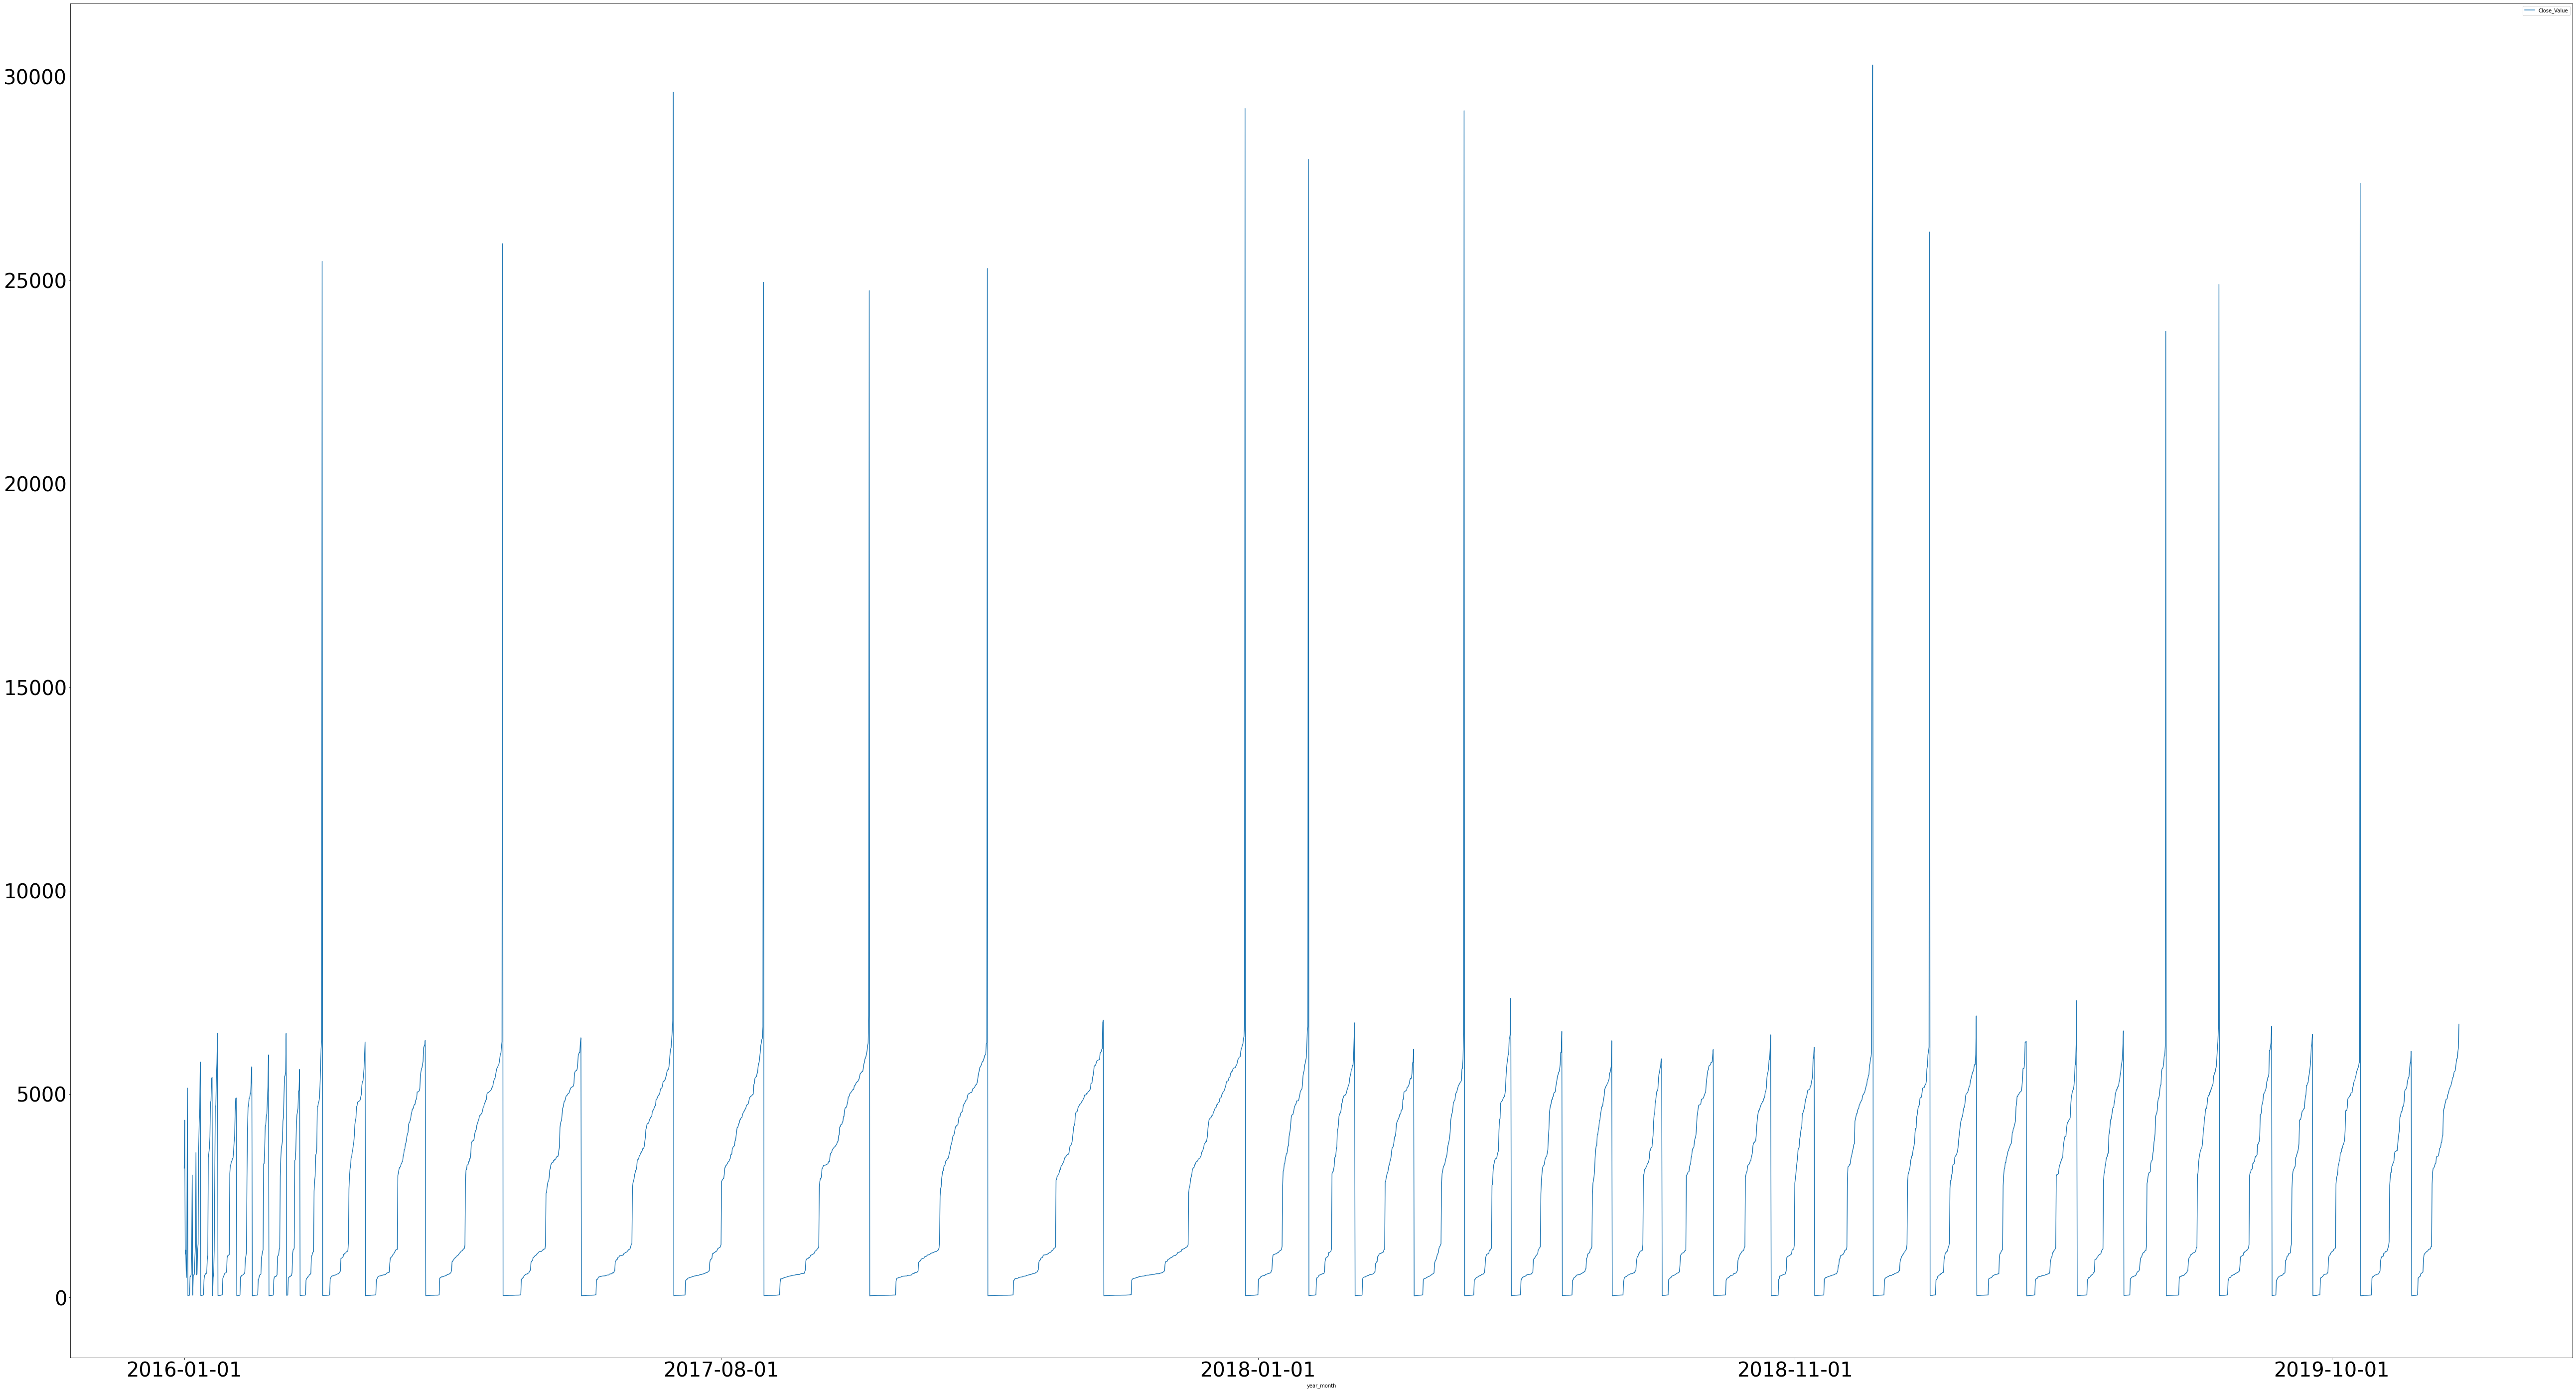

In [ ]:
# First let us simply plot the total sales over time as a timeseries 

data.plot.line(x='year_month',y='Close_Value',figsize=(90,50),fontsize=40);

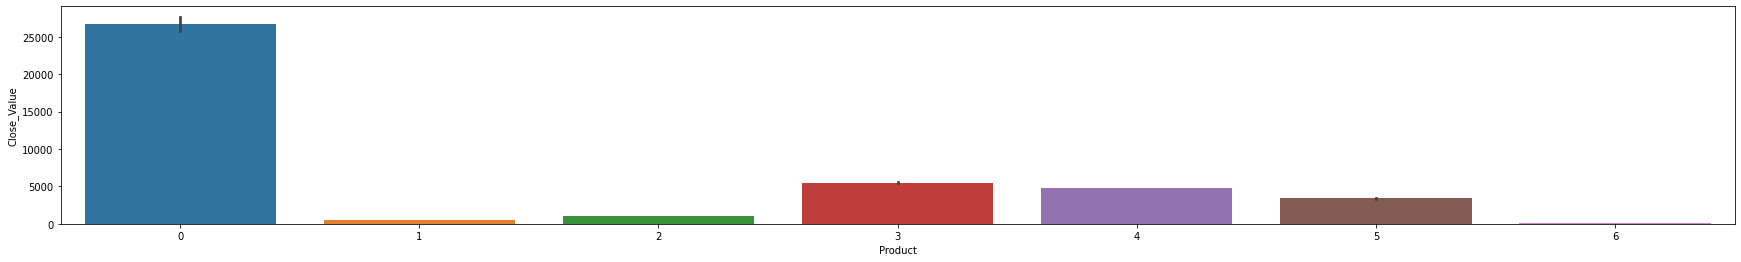

In [ ]:
# Now let us break down the avg sales to each individual product (bar chart)

fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.barplot(x='Product', y='Close_Value', data=data, ax=axis1)

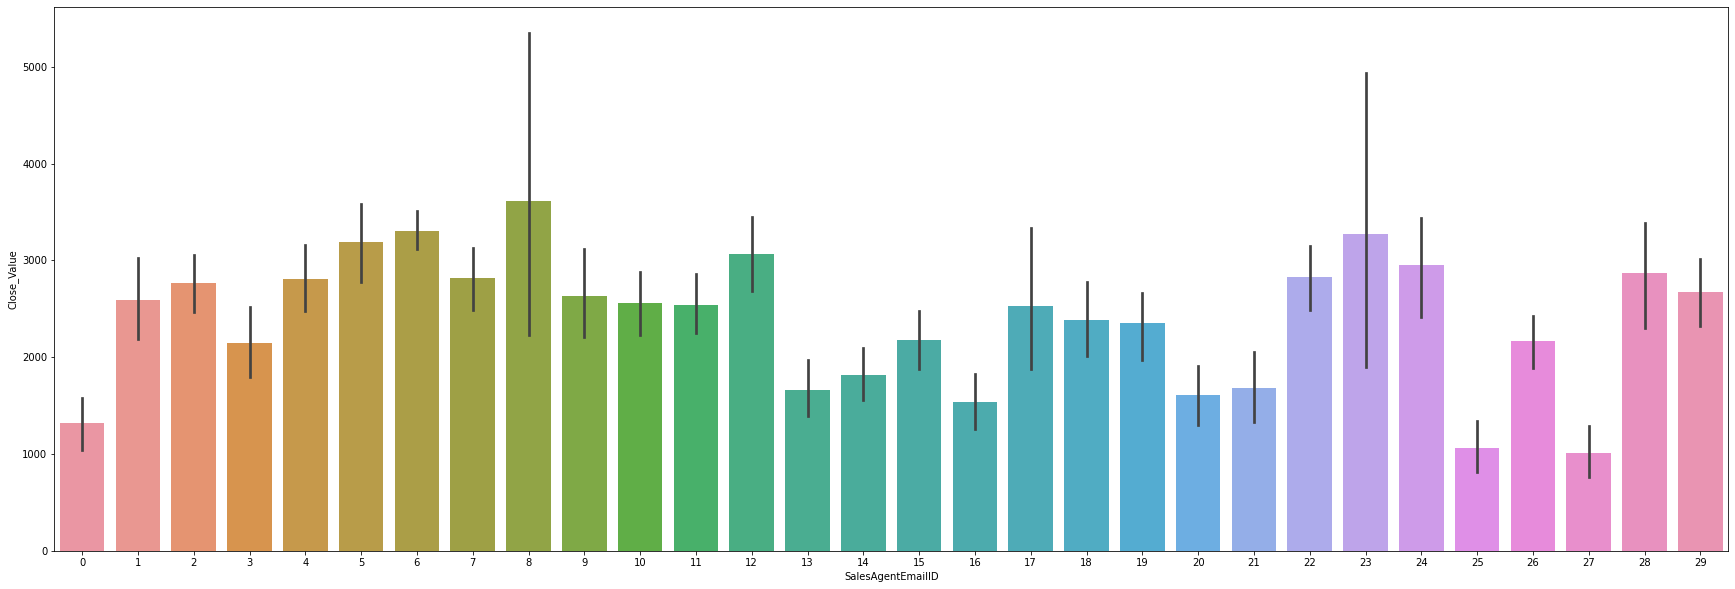

In [ ]:
# Now let us break down the sales to each individual SalesAgentEmailID	 

fig, (axis1) = plt.subplots(1,1,figsize=(30,10))
sns.barplot(x='SalesAgentEmailID', y='Close_Value', data=data, ax=axis1);

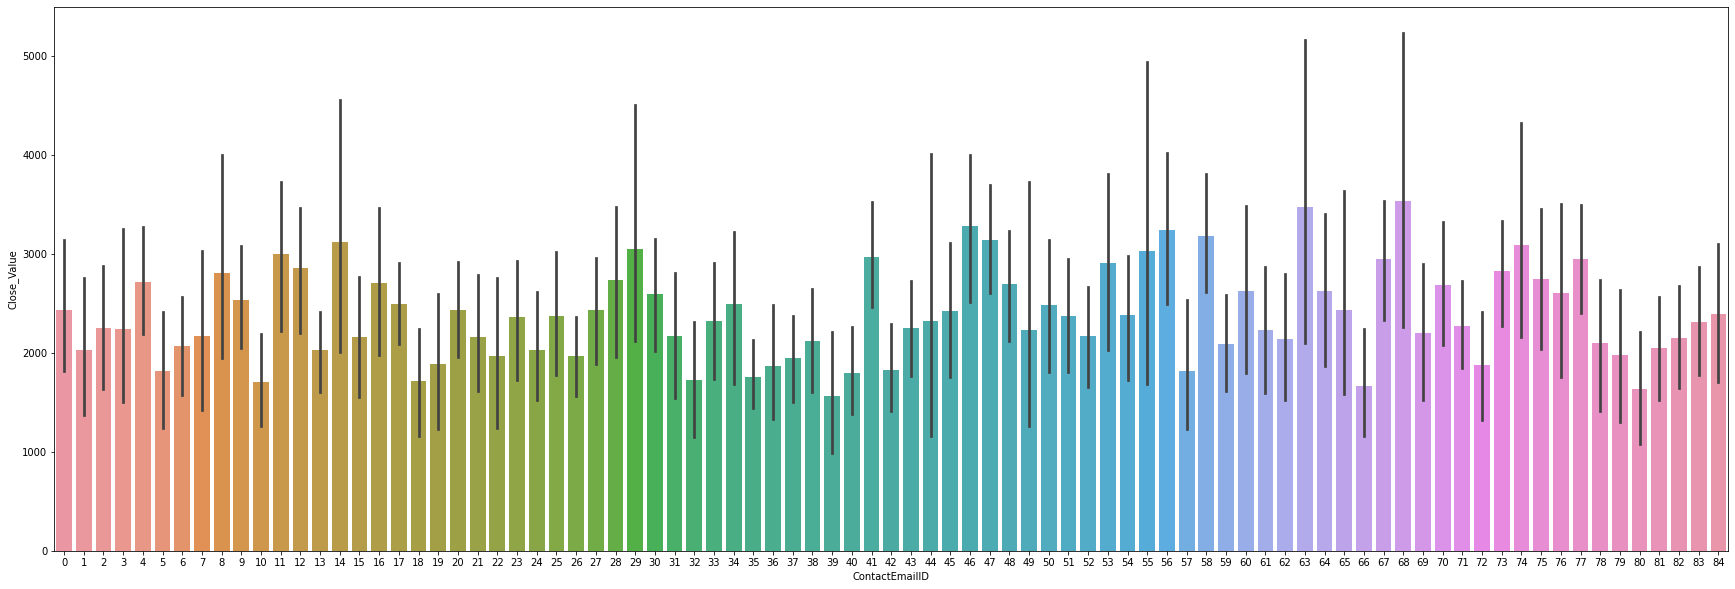

In [ ]:
# Now let us break down the sales to each individual ContactEmailID 

fig, (axis1) = plt.subplots(1,1,figsize=(30,10))
sns.barplot(x='ContactEmailID', y='Close_Value', data=data, ax=axis1);

# Feature engineering 

In [ ]:
# Create month and year feature 

data['month'] = pd.DatetimeIndex(data['year_month']).month
data['year'] = pd.to_datetime(data['year_month']).dt.strftime('%Y')

data.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value,month,year
0,16,6,3.387500,5,2016-01-01,3180,1,2016
1,6,66,3.783251,4,2016-01-01,4359,1,2016
2,19,71,4.297297,2,2016-02-01,1070,2,2016
3,8,27,3.041667,2,2016-02-01,1164,2,2016
4,22,47,4.225225,1,2016-03-01,493,3,2016


In [ ]:
# Lag features 

data['lag_1'] = data['Close_Value'].shift(1)
data['lag_2'] = data['Close_Value'].shift(2)
data['lag_3'] = data['Close_Value'].shift(3)
data['lag_4'] = data['Close_Value'].shift(4)

data.head(10)

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4
0,16,6,3.387500,5,2016-01-01,3180,1,2016,NaN,NaN,NaN,NaN
1,6,66,3.783251,4,2016-01-01,4359,1,2016,3180.0,NaN,NaN,NaN
2,19,71,4.297297,2,2016-02-01,1070,2,2016,4359.0,3180.0,NaN,NaN
3,8,27,3.041667,2,2016-02-01,1164,2,2016,1070.0,4359.0,3180.0,NaN
4,22,47,4.225225,1,2016-03-01,493,3,2016,1164.0,1070.0,4359.0,3180.0
5,14,23,3.985075,2,2016-03-01,1059,3,2016,493.0,1164.0,1070.0,4359.0
6,15,30,4.544379,4,2016-03-01,5149,3,2016,1059.0,493.0,1164.0,1070.0
7,21,59,4.968750,6,2016-04-01,48,4,2016,5149.0,1059.0,493.0,1164.0
8,26,27,3.209877,6,2016-04-01,54,4,2016,48.0,5149.0,1059.0,493.0
9,25,42,3.515625,6,2016-04-01,57,4,2016,54.0,48.0,5149.0,1059.0


In [ ]:
data['lag_(-1)'] = data['Close_Value'].shift(-1)
data['lag_(-2)'] = data['Close_Value'].shift(-2)
data['lag_(-3)'] = data['Close_Value'].shift(-3)
data['lag_(-4)'] = data['Close_Value'].shift(-4)

data.head(10)

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4)
0,16,6,3.387500,5,2016-01-01,3180,1,2016,NaN,NaN,NaN,NaN,4359.0,1070.0,1164.0,493.0
1,6,66,3.783251,4,2016-01-01,4359,1,2016,3180.0,NaN,NaN,NaN,1070.0,1164.0,493.0,1059.0
2,19,71,4.297297,2,2016-02-01,1070,2,2016,4359.0,3180.0,NaN,NaN,1164.0,493.0,1059.0,5149.0
3,8,27,3.041667,2,2016-02-01,1164,2,2016,1070.0,4359.0,3180.0,NaN,493.0,1059.0,5149.0,48.0
4,22,47,4.225225,1,2016-03-01,493,3,2016,1164.0,1070.0,4359.0,3180.0,1059.0,5149.0,48.0,54.0
5,14,23,3.985075,2,2016-03-01,1059,3,2016,493.0,1164.0,1070.0,4359.0,5149.0,48.0,54.0,57.0
6,15,30,4.544379,4,2016-03-01,5149,3,2016,1059.0,493.0,1164.0,1070.0,48.0,54.0,57.0,57.0
7,21,59,4.968750,6,2016-04-01,48,4,2016,5149.0,1059.0,493.0,1164.0,54.0,57.0,57.0,513.0
8,26,27,3.209877,6,2016-04-01,54,4,2016,48.0,5149.0,1059.0,493.0,57.0,57.0,513.0,519.0
9,25,42,3.515625,6,2016-04-01,57,4,2016,54.0,48.0,5149.0,1059.0,57.0,513.0,519.0,559.0


In [ ]:
# Rolling Window Statistics

data['rolling_avg'] = data['Close_Value'].rolling(window=5).mean()
data['rolling_min'] = data['Close_Value'].rolling(window=5).min()
data['rolling_max'] = data['Close_Value'].rolling(window=5).max()
data.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
0,16,6,3.387500,5,2016-01-01,3180,1,2016,NaN,NaN,NaN,NaN,4359.0,1070.0,1164.0,493.0,NaN,NaN,NaN
1,6,66,3.783251,4,2016-01-01,4359,1,2016,3180.0,NaN,NaN,NaN,1070.0,1164.0,493.0,1059.0,NaN,NaN,NaN
2,19,71,4.297297,2,2016-02-01,1070,2,2016,4359.0,3180.0,NaN,NaN,1164.0,493.0,1059.0,5149.0,NaN,NaN,NaN
3,8,27,3.041667,2,2016-02-01,1164,2,2016,1070.0,4359.0,3180.0,NaN,493.0,1059.0,5149.0,48.0,NaN,NaN,NaN
4,22,47,4.225225,1,2016-03-01,493,3,2016,1164.0,1070.0,4359.0,3180.0,1059.0,5149.0,48.0,54.0,2053.2,493.0,4359.0


In [ ]:
data.dropna(subset = ["rolling_avg","lag_(-4)"], inplace=True) 

In [ ]:
data.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,year_month,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
4,22,47,4.225225,1,2016-03-01,493,3,2016,1164.0,1070.0,4359.0,3180.0,1059.0,5149.0,48.0,54.0,2053.2,493.0,4359.0
5,14,23,3.985075,2,2016-03-01,1059,3,2016,493.0,1164.0,1070.0,4359.0,5149.0,48.0,54.0,57.0,1629.0,493.0,4359.0
6,15,30,4.544379,4,2016-03-01,5149,3,2016,1059.0,493.0,1164.0,1070.0,48.0,54.0,57.0,57.0,1787.0,493.0,5149.0
7,21,59,4.968750,6,2016-04-01,48,4,2016,5149.0,1059.0,493.0,1164.0,54.0,57.0,57.0,513.0,1582.6,48.0,5149.0
8,26,27,3.209877,6,2016-04-01,54,4,2016,48.0,5149.0,1059.0,493.0,57.0,57.0,513.0,519.0,1360.6,48.0,5149.0


In [ ]:
# Checking is the dataset is stationary 

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['Close_Value'])

# Here we see that the p < 0.05, which says that the data is stationary and we dont have to convert it to a stationary series. 

1. ADF :  -10.768535762304225
2. P-Value :  2.41742157794445e-19
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 4223
5. Critical Values :
	 1% :  -3.431899438634489
	 5% :  -2.8622246566066702
	 10% :  -2.567134448299063


In [ ]:
data.to_csv("/content/drive/My Drive/feature_engineered.csv")

# LSTM

In [ ]:
data_lstm = pd.read_csv("/content/drive/My Drive/feature_engineered.csv",parse_dates=['year_month'],index_col="year_month")

In [ ]:
data_lstm.drop(['Unnamed: 0'], axis='columns', inplace=True)   

In [ ]:
data_lstm.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
year_month,,,,,,,,,,,,,,,,,,
2016-03-01,22,47,0.515702,1,0.015041,3,2016,0.037223,0.034116,0.142843,0.103868,0.033752,0.168959,0.000331,0.000529,0.136299,0.073186,0.142560
2016-03-01,14,23,0.462561,2,0.033752,3,2016,0.015041,0.037223,0.034116,0.142843,0.168959,0.000331,0.000529,0.000628,0.107517,0.073186,0.142560
2016-03-01,15,30,0.586326,4,0.168959,3,2016,0.033752,0.015041,0.037223,0.034116,0.000331,0.000529,0.000628,0.000628,0.118237,0.073186,0.168684
2016-04-01,21,59,0.680233,6,0.000331,4,2016,0.168959,0.033752,0.015041,0.037223,0.000529,0.000628,0.000628,0.015702,0.104368,0.001608,0.168684
2016-04-01,26,27,0.291021,6,0.000529,4,2016,0.000331,0.168959,0.033752,0.015041,0.000628,0.000628,0.015702,0.015901,0.089305,0.001608,0.168684


In [ ]:
# Train data is 90% and test data is 10%

train_size = int(len(data_lstm) * 0.9)
test_size = len(data_lstm) - train_size

In [ ]:
# Train test split

train, test = data_lstm.iloc[0:train_size,:] , data_lstm.iloc[train_size:len(data_lstm),:]

print(len(train), len(test))

3807 423


In [ ]:
# Scaling all the variables for a better accuracy

from sklearn.preprocessing import RobustScaler

In [ ]:
f_columns = ["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(train[['Close_Value']])
train['Close_Value'] = cnt_transformer.transform(train[['Close_Value']])
test['Close_Value'] = cnt_transformer.transform(test[['Close_Value']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x_train = train[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_train = train[["Close_Value"]]

x_test = test[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_test = test[["Close_Value"]]

In [ ]:
x_train=x_train.values.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3807, 17, 1) (3807, 1)
(423, 17, 1) (423, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [ ]:
# Building the LSTM model

model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units = 128,
            input_shape = (x_train.shape[1],x_train.shape[2])
        )
    )
)

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
history = model.fit(
    x_train,y_train,
    epochs = 30,
    batch_size = 32,
    validation_split = 0.1,
    shuffle = False
)

Epoch 1/30
108/108 [==============================] - 4s 34ms/step - loss: 0.1609 - val_loss: 0.1671
Epoch 2/30
108/108 [==============================] - 3s 27ms/step - loss: 0.1266 - val_loss: 0.1311
Epoch 3/30
108/108 [==============================] - 3s 27ms/step - loss: 0.0871 - val_loss: 0.0703
Epoch 4/30
108/108 [==============================] - 3s 27ms/step - loss: 0.0452 - val_loss: 0.0747
Epoch 5/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0372 - val_loss: 0.1145
Epoch 6/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0355 - val_loss: 0.0296
Epoch 7/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0180 - val_loss: 0.0321
Epoch 8/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0193 - val_loss: 0.0165
Epoch 9/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0150 - val_loss: 0.0158
Epoch 10/30
108/108 [==============================] - 3s 28ms/step - loss: 0.0152 - val_lo

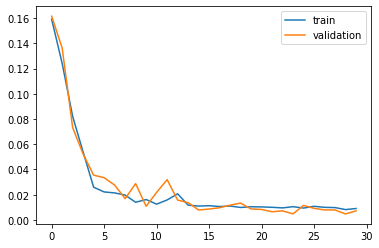

In [ ]:
# Loss vs validation

plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend();

In [ ]:
# Predicting 

y_pred = model.predict(x_test)

In [ ]:
y_train_inv = cnt_transformer.inverse_transform(y_train.values.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.values.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

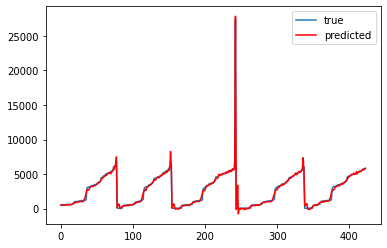

In [ ]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(y_pred), np.array(y_test))
print("rmse error is: " + str(rmse_val))

rmse error is: 0.07736091422113742


# XGBoost

In [ ]:
data_xgboost =  pd.read_csv("/content/drive/My Drive/feature_engineered.csv",parse_dates=['year_month'],index_col="year_month")

In [ ]:
data_xgboost.drop(['Unnamed: 0'], axis='columns', inplace=True)   

In [ ]:
data_xgboost.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
year_month,,,,,,,,,,,,,,,,,,
2016-03-01,22,47,4.225225,1,493,3,2016,1164.0,1070.0,4359.0,3180.0,1059.0,5149.0,48.0,54.0,2053.2,493.0,4359.0
2016-03-01,14,23,3.985075,2,1059,3,2016,493.0,1164.0,1070.0,4359.0,5149.0,48.0,54.0,57.0,1629.0,493.0,4359.0
2016-03-01,15,30,4.544379,4,5149,3,2016,1059.0,493.0,1164.0,1070.0,48.0,54.0,57.0,57.0,1787.0,493.0,5149.0
2016-04-01,21,59,4.968750,6,48,4,2016,5149.0,1059.0,493.0,1164.0,54.0,57.0,57.0,513.0,1582.6,48.0,5149.0
2016-04-01,26,27,3.209877,6,54,4,2016,48.0,5149.0,1059.0,493.0,57.0,57.0,513.0,519.0,1360.6,48.0,5149.0


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Train data is 90% and test data is 10%

train_size = int(len(data_xgboost) * 0.9)
test_size = len(data_xgboost) - train_size

In [ ]:
train, test = data_xgboost.iloc[0:train_size,:] , data_xgboost.iloc[train_size:len(data_lstm),:]

print(len(train), len(test))

3807 423


In [ ]:
f_columns = ["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(train[['Close_Value']])
train['Close_Value'] = cnt_transformer.transform(train[['Close_Value']])
test['Close_Value'] = cnt_transformer.transform(test[['Close_Value']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x_train = train[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_train = train[["Close_Value"]]

x_test = test[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_test = test[["Close_Value"]]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3807, 17) (3807, 1)
(423, 17) (423, 1)


In [ ]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test)

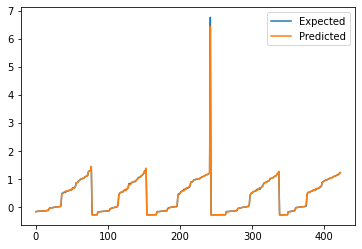

In [ ]:
plt.plot(y_test.to_numpy(),label='Expected')
plt.plot(y_pred, label='Predicted')
plt.legend();

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(y_pred), np.array(y_test))
print("rmse error is: " + str(rmse_val))

rmse error is: 0.8560390551193241




# Forecasting 

We are choosing LSTM model for forecasting as it has the least RMSE value

In [ ]:
data_lstm.head()

,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
year_month,,,,,,,,,,,,,,,,,,
2016-03-01,22,47,0.481551,1,493,3,2016,0.016480,-0.007725,0.838934,0.535342,-0.010557,1.042616,-0.271204,-0.269657,0.237923,-0.152738,0.764578
2016-03-01,14,23,0.167369,2,1059,3,2016,-0.156302,0.016480,-0.007982,0.838934,1.042616,-0.270890,-0.269657,-0.268884,0.127330,-0.152738,0.764578
2016-03-01,15,30,0.899090,4,5149,3,2016,-0.010557,-0.156302,0.016222,-0.007982,-0.270890,-0.269345,-0.268884,-0.268884,0.168522,-0.152738,0.954940
2016-04-01,21,59,1.454283,6,48,4,2016,1.042616,-0.010557,-0.156560,0.016222,-0.269345,-0.268572,-0.268884,-0.151328,0.115233,-0.280980,0.954940
2016-04-01,26,27,-0.846800,6,54,4,2016,-0.270890,1.042616,-0.010815,-0.156560,-0.268572,-0.268572,-0.151328,-0.149781,0.057356,-0.280980,0.954940


In [ ]:
data = data_lstm.reset_index(level='year_month')

In [ ]:
data.head()

,year_month,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
0,2016-03-01,22,47,0.481551,1,493,3,2016,0.016480,-0.007725,0.838934,0.535342,-0.010557,1.042616,-0.271204,-0.269657,0.237923,-0.152738,0.764578
1,2016-03-01,14,23,0.167369,2,1059,3,2016,-0.156302,0.016480,-0.007982,0.838934,1.042616,-0.270890,-0.269657,-0.268884,0.127330,-0.152738,0.764578
2,2016-03-01,15,30,0.899090,4,5149,3,2016,-0.010557,-0.156302,0.016222,-0.007982,-0.270890,-0.269345,-0.268884,-0.268884,0.168522,-0.152738,0.954940
3,2016-04-01,21,59,1.454283,6,48,4,2016,1.042616,-0.010557,-0.156560,0.016222,-0.269345,-0.268572,-0.268884,-0.151328,0.115233,-0.280980,0.954940
4,2016-04-01,26,27,-0.846800,6,54,4,2016,-0.270890,1.042616,-0.010815,-0.156560,-0.268572,-0.268572,-0.151328,-0.149781,0.057356,-0.280980,0.954940


In [ ]:
f_columns = ["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(data[f_columns].to_numpy())
data.loc[:, f_columns] = f_transformer.transform(
  data[f_columns].to_numpy()
)

In [ ]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(data[['Close_Value']])
data['Close_Value'] = cnt_transformer.transform(data[['Close_Value']])

In [ ]:
data.head()

,year_month,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
0,2016-03-01,0.533333,0.195122,0.484982,-1.000000,-0.159069,-0.833333,-1.0,0.012536,-0.011387,0.830752,0.529208,-0.014450,1.030934,-0.273169,-0.271624,0.230812,-0.158057,0.757795
1,2016-03-01,0.000000,-0.390244,0.168562,-0.666667,-0.014321,-0.833333,-1.0,-0.159130,0.012666,-0.011394,0.831284,1.031586,-0.273169,-0.271635,-0.270857,0.120466,-0.158057,0.757795
2,2016-03-01,0.066667,-0.219512,0.905496,0.000000,1.031648,-0.833333,-1.0,-0.014327,-0.159033,0.012674,-0.011401,-0.273018,-0.271635,-0.270868,-0.270857,0.161566,-0.158057,0.947996
3,2016-04-01,0.466667,0.487805,1.464644,0.666667,-0.272873,-0.666667,-1.0,1.032043,-0.014202,-0.159135,0.012683,-0.271483,-0.270868,-0.270868,-0.154338,0.108396,-0.285940,0.947996
4,2016-04-01,0.800000,-0.292683,-0.852833,0.666667,-0.271338,-0.666667,-1.0,-0.272977,1.032369,-0.014211,-0.159236,-0.270716,-0.270868,-0.154289,-0.152804,0.050647,-0.285940,0.947996


Given current date : June 2019

In [ ]:
# Forecast for current month 

data_current_month = data[data['year_month'].between('2019-06-01', '2019-06-30')]

In [ ]:
data_current_month.head()

,year_month,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
3609,2019-06-01,0.133333,-0.463415,-0.941137,0.666667,-0.271850,-0.333333,0.5,1.391238,1.292605,1.215337,1.191007,-0.271483,-0.271635,-0.271379,-0.270857,0.965884,-0.284791,1.286024
3610,2019-06-01,0.733333,-0.365854,-0.784574,0.666667,-0.271338,-0.333333,0.5,-0.271954,1.391633,1.293432,1.216116,-0.271483,-0.271379,-0.270868,-0.270857,0.668869,-0.284791,1.286024
3611,2019-06-01,-0.400000,-0.390244,1.460385,0.666667,-0.271338,-0.333333,0.5,-0.271442,-0.271878,1.392523,1.294261,-0.271228,-0.270868,-0.270868,-0.270346,0.366756,-0.284791,1.286024
3612,2019-06-01,0.133333,-0.317073,-0.041828,0.666667,-0.271082,-0.333333,0.5,-0.271442,-0.271366,-0.272052,1.393415,-0.270716,-0.270868,-0.270357,-0.270346,0.048826,-0.284791,1.286024
3613,2019-06-01,0.600000,0.121951,3.306527,0.666667,-0.270571,-0.333333,0.5,-0.271186,-0.271366,-0.271540,-0.272226,-0.270716,-0.270357,-0.270357,-0.270091,-0.289133,-0.284791,-0.277958


In [ ]:
x_test = data_current_month[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_test = data_current_month[['Close_Value']]

In [ ]:
x_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test_inv = cnt_transformer.inverse_transform(y_test.values.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

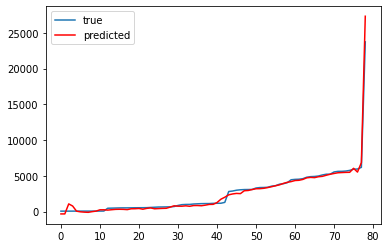

In [ ]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(y_pred), np.array(y_test))
print("rmse error for current month is: " + str(rmse_val))

rmse error for current month is: 0.12454947295776107


In [ ]:
# Forecast for the current quarter

data_current_quarter = data[data['year_month'].between('2019-06-01', '2019-08-30')]

In [ ]:
data_current_quarter.tail()

,year_month,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
3880,2019-08-01,1.000000,-0.536585,-0.662560,0.000000,1.266927,0.0,0.5,1.121842,1.101714,1.099347,1.080323,1.269437,1.293749,1.315736,1.417912,1.139286,1.232272,1.169496
3881,2019-08-01,0.800000,-0.219512,0.527813,-0.333333,1.269484,0.0,0.5,1.267413,1.122185,1.102420,1.100051,1.294501,1.315736,1.418765,-0.272646,1.178201,1.254400,1.171903
3882,2019-08-01,-0.333333,-0.487805,-1.129364,-0.333333,1.294546,0.0,0.5,1.269971,1.267784,1.122904,1.103126,1.316496,1.418765,-0.272658,-0.272646,1.218209,1.257849,1.195498
3883,2019-08-01,0.933333,0.341463,-0.058821,-0.333333,1.316540,0.0,0.5,1.295043,1.270343,1.268596,1.123623,1.419565,-0.272658,-0.272658,-0.272135,1.262067,1.280839,1.216203
3884,2019-08-01,-0.400000,-0.292683,-1.074464,-0.333333,1.419602,0.0,0.5,1.317045,1.295420,1.271156,1.269408,-0.272506,-0.272658,-0.272146,-0.270857,1.322729,1.444357,1.313230


In [ ]:
x_test = data_current_quarter[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_test = data_current_quarter[['Close_Value']]

In [ ]:
x_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test_inv = cnt_transformer.inverse_transform(y_test.values.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

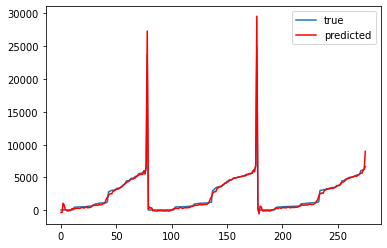

In [ ]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(y_pred), np.array(y_test))
print("rmse error for current quarter is: " + str(rmse_val))

rmse error for current quarter is: 0.11464377720470002


In [ ]:
# Forecast for the current financial year

data_current_financial_year = data[data['year_month'].between('2019-06-01', '2019-12-31')]

In [ ]:
data_current_financial_year.tail()

,year_month,SalesAgentEmailID,ContactEmailID,sentiment_scores,Product,Close_Value,month,year,lag_1,lag_2,lag_3,lag_4,lag_(-1),lag_(-2),lag_(-3),lag_(-4),rolling_avg,rolling_min,rolling_max
4225,2019-12-01,0.733333,-0.195122,0.759713,-0.333333,1.136244,0.666667,0.5,1.133099,1.109647,1.099347,1.098258,1.140281,1.164643,1.193788,1.214003,1.120245,1.252389,1.046467
4226,2019-12-01,0.666667,0.170732,1.159084,0.000000,1.140336,0.666667,0.5,1.136681,1.133444,1.110357,1.100051,1.165345,1.193788,1.214751,1.217325,1.129245,1.254400,1.050319
4227,2019-12-01,0.000000,-0.878049,1.331592,0.000000,1.165399,0.666667,0.5,1.140774,1.137027,1.134170,1.111068,1.194501,1.214751,1.218075,1.257442,1.142980,1.266758,1.073914
4228,2019-12-01,-0.533333,1.048780,-0.374796,-0.333333,1.194553,0.666667,0.5,1.165846,1.141121,1.137754,1.134896,1.215473,1.218075,1.258213,1.283761,1.160408,1.293484,1.101360
4229,2019-12-01,-0.666667,0.463415,-0.274710,0.000000,1.215523,0.666667,0.5,1.195011,1.166198,1.141851,1.138483,1.218798,1.258213,1.284546,1.431455,1.177265,1.297507,1.121103


In [ ]:
x_test = data_current_financial_year[["SalesAgentEmailID","ContactEmailID","month","year","Product","sentiment_scores","lag_1","lag_2","lag_3","lag_4","rolling_avg","rolling_min","rolling_max","lag_(-1)","lag_(-2)","lag_(-3)","lag_(-4)"]]
y_test = data_current_financial_year[['Close_Value']]

In [ ]:
x_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test_inv = cnt_transformer.inverse_transform(y_test.values.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

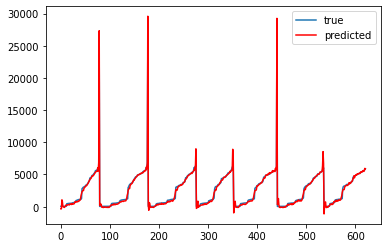

In [ ]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(y_pred), np.array(y_test))
print("rmse error for current financial year is: " + str(rmse_val))

rmse error for current financial year is: 0.1009921385624368
